# What makes a Tweet an indicator of an ongoing Disaster 

We all know about the "Boy who cried Wolf", and it's equivalent tweets such as "its shaking in San Francisco" which could mean its fun being in SF or an earthqauke. 

In any disaster situation avaliabiltiy of the first responder could make the difference between life and death. Last year when there was severe weather system in Bayarea, crowd sourced tweets did a better job in giving updates on flood zones then any other medium. 

For a disaster management system supporting First responder team its important to understand when a tweet signals an actual disaster.

# Business Understanding

From a business perspective, we are tasked with identifying patterns in the tweet that would indicate a disaster in progress and the first responders can respond quickly and efficiently in the form of 
- Tweets asking people to stay away form the disaster zone 
- Checking progress and providing additional support 
- Providing on time help 

### Data Mining Goals and KPI

- Build predictive model with 75% accuracy
- Build predictive model with 75% recall
- Build predictive model with 75% precision

# Data Understanding

The Data is from Kaggle (https://www.kaggle.com/competitions/nlp-getting-started/overview). Given its a getting started NLP project there are multiple articles and solutions provided online to solve it. 
List of sources I referred,
- https://www.kaggle.com/competitions/nlp-getting-started/code 
- https://www.kaggle.com/code/jessicaval/disaster-tweets-prediction-logreg-embeddings
- https://medium.com/analytics-vidhya/introduction-to-nlp-with-disaster-tweets-3b672a75748c


### The data is made of the following attributes 

- id: a unique identifier of every tweet
- keyword: a particular keyword from the tweet (this can be blank)
- location: the location the tweet was sent from (this can be blank)
- text: the text of the tweet
- target: present only in the train data, and denotes if the tweet is about a real disaster (1) or not (0)

In [1]:
import pandas as pd
import numpy as np
import string

In [2]:
df_test = pd.read_csv('nlp-getting-started/test.csv')
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [3]:
df = pd.read_csv('nlp-getting-started/train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.shape

(7613, 5)

In [5]:
categorical = [var for var in df.columns if df[var].dtype in ['object', 'category', 'string']]
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['keyword', 'location', 'text']


In [6]:
df[categorical].head()

,keyword,location,text
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,NaN,NaN,All residents asked to 'shelter in place' are ...
3,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...


In [7]:
df.keyword.value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [8]:
df.location.value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

### Null value Count

In [9]:
df[categorical].isnull().sum()

keyword       61
location    2533
text           0
dtype: int64

### Frequency distribution of categorical variables

In [10]:
for var in categorical: 
    print(df[var].value_counts()/np.float(len(df)))

fatalities               0.005911
deluge                   0.005517
armageddon               0.005517
sinking                  0.005386
damage                   0.005386
                           ...   
forest%20fire            0.002496
epicentre                0.001576
threat                   0.001445
inundation               0.001314
radiation%20emergency    0.001182
Name: keyword, Length: 221, dtype: float64
USA                    0.013661
New York               0.009326
United States          0.006568
London                 0.005911
Canada                 0.003809
                         ...   
MontrÌ©al, QuÌ©bec     0.000131
Montreal               0.000131
ÌÏT: 6.4682,3.18287    0.000131
Live4Heed??            0.000131
Lincoln                0.000131
Name: location, Length: 3341, dtype: float64
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...        0.001314
He came to a land which was engul

/var/folders/3y/h66zz12x4p9_7hpzsntxf_6m0000gn/T/ipykernel_67911/2172132597.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.float(len(df)))
/var/folders/3y/h66zz12x4p9_7hpzsntxf_6m0000gn/T/ipykernel_67911/2172132597.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df[var].value_counts()/np.floa

### Remove Duplicate tweets 

In [11]:
#Find all the duplicated Tweets
df_duplicated = df[df.duplicated(["text"], keep = False)] #179 rows
df_duplicated.shape

(179, 5)

In [12]:
df = df.drop_duplicates(subset=['keyword','location','text'])
df.shape

(7552, 5)

### Remove tweets labelled more then once 

In [13]:
#Find all the tweets that have been labeled more than once
pd.set_option('display.max_colwidth', None) #to display the whole text
df_errors = df.groupby('text').filter(lambda x: x['target'].nunique() > 1, display)
df_errors.head(20)

,id,keyword,location,text,target
1197,1723,buildings%20burning,"Mackay, QLD, Australia",Mmmmmm I'm burning.... I'm burning buildings I'm building.... Oooooohhhh oooh ooh...,1
1214,1752,buildings%20burning,"Epic City, BB.",I Pledge Allegiance To The P.O.P.E. And The Burning Buildings of Epic City. ??????,0
1221,1760,buildings%20burning,dallas,like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit,1
1331,1922,burning%20buildings,"Mackay, QLD, Australia",Mmmmmm I'm burning.... I'm burning buildings I'm building.... Oooooohhhh oooh ooh...,0
1349,1950,burning%20buildings,dallas,like for the music video I want some real action shit like burning buildings and police chases not some weak ben winston shit,0
1365,1968,burning%20buildings,"Epic City, BB.",I Pledge Allegiance To The P.O.P.E. And The Burning Buildings of Epic City. ??????,1
3240,4656,engulfed,NaN,He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam,0
3243,4659,engulfed,Kuwait,He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam,1
3248,4669,engulfed,Bahrain,He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam,1
4221,5996,hazardous,NaN,#foodscare #offers2go #NestleIndia slips into loss after #Magginoodle #ban unsafe and hazardous for #humanconsumption,1


In [14]:
df_errors.shape

(22, 5)

In [15]:
# remove the errors from the training dataset 
df = df[~df.id.isin(df_errors.id)]

In [16]:
df.shape

(7530, 5)

In [17]:
df[categorical].isnull().sum()

keyword       61
location    2489
text           0
dtype: int64

# Text Processing 

### The text preprocessing steps followed in this project are:

- Tokenization
- Lower casing
- Stop words removal
- Filling Missing Data by Keyword Extraction and Entity Recognition
- Entities, URL Links and Punctuation Removal
- Spelling Correction
- Lemmatization

In [18]:
# initialise the stop words
# downloaded from https://github.com/igorbrigadir/stopwords/blob/master/en/terrier.txt 
# alternatively can use nltk.download("stopwords")
with open('helper/stopwords.txt') as f:
    stopwords = f.read().splitlines()

stop_words = set(stopwords) 

### Lemmatization with NLTK

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item.
Examples of lemmatization:

- rocks -> rock
- corpora -> corpus
- better -> good

In [19]:
import nltk
from builtins import str
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import emoji
from spellchecker import SpellChecker
import urllib.parse
import re
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download("stopwords")

[nltk_data] Downloading package wordnet to /Users/sridevi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/sridevi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/sridevi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sridevi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
# initialise the Lemmatizer
lemmatizer = WordNetLemmatizer()
print("rocks :", lemmatizer.lemmatize("rocks"))
print("corpora :", lemmatizer.lemmatize("corpora"))
print("better :", lemmatizer.lemmatize("better", pos ="a"))

rocks : rock
corpora : corpus
better : good


In [21]:
# make sure some words are not flagged as misspelled
spell = SpellChecker()
spell.word_frequency.load_words(['aftershock'])

def preprocess_text(text, ignorespelling):
    # Check if the input is a string
    if not isinstance(text, str):
        # Return non-string input as-is or convert to string
        return str(text) if text is not None else ''
    # Unquote words 
    text = urllib.parse.unquote(text)
    text = text.replace("20"," ")
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove user mentions
    text = re.sub(r"@\S+", "", text)
    # Remove hashtags
    text = re.sub(r"#\S+", "", text)
    # Remove punctuation
    text = re.sub(f"[{string.punctuation}]", "", text)
    # Remove emojis
    text = emoji.emojize(text, variant='emoji_type')
    # Lowercase the text
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stop words
    words = [w for w in words if w not in stop_words]
    # fix the spelling 
    if(ignorespelling == False):
        prevwords = words.copy()
        words[:] = [spell.correction(w) for w in words]
        # if words return a list with [None] after spell check then revert to the old list 
        for w in words:
            if w == None:
                words = prevwords   
                break;
    # Join the tokens back together
    return ' '.join(words)

string_with_url = "Chek out this;,, amzing:: website: https://www.example.com! #AwesomeContent @username"
string_with_no_words = "goooooooaaaaaal"

print(preprocess_text(string_with_url, False))
print(preprocess_text(string_with_no_words, False))

check amazing website
goooooooaaaaaal


In [22]:
# note this code snippet takes a while to complete 

for var in categorical: 
    if var == "location":
        df[var] = df[var].apply(lambda x: preprocess_text(x, True) if pd.isna(x)!= True else x)
    else:
        df[var] = df[var].apply(lambda x: preprocess_text(x, False) if pd.isna(x)!= True else x)


In [23]:
#storing the results in a CSV file for futher processing since the the Text processing step takes a long time
df.to_csv('nlp-getting-started/train_with_text_processed.csv',index=False)

In [24]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason may allah forgive,1
1,4,NaN,NaN,forest fire near la range ask canada,1
2,5,NaN,NaN,residents asked shelter place being notified officers evacuation shelter place orders expected,1
3,6,NaN,NaN,13000 people receive evacuation orders california,1
4,7,NaN,NaN,just photo ruby smoke pours school,1


In [25]:
df[categorical].isnull().sum()

keyword       61
location    2489
text           0
dtype: int64

In [26]:
print(df['keyword'].value_counts()/np.float(len(df)))

fatalities             0.005976
deluge                 0.005578
armageddon             0.005578
damage                 0.005445
body bags              0.005445
                         ...   
forest fire            0.002523
epicentre              0.001594
threat                 0.001461
foundation             0.001328
radiation emergency    0.001195
Name: keyword, Length: 221, dtype: float64


/var/folders/3y/h66zz12x4p9_7hpzsntxf_6m0000gn/T/ipykernel_67911/817671917.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(df['keyword'].value_counts()/np.float(len(df)))


In [27]:
df2 = pd.read_csv('nlp-getting-started/train_with_text_processed.csv')
df2.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason may allah forgive,1
1,4,NaN,NaN,forest fire near la range ask canada,1
2,5,NaN,NaN,residents asked shelter place being notified officers evacuation shelter place orders expected,1
3,6,NaN,NaN,13000 people receive evacuation orders california,1
4,7,NaN,NaN,just photo ruby smoke pours school,1


# Filling missing Data 

There are missing data in both training and test dataset. 
Example in the training data following is the null value count 
- keyword       61
- location    2533
- text           0

### Keyword Cloud 

In [28]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

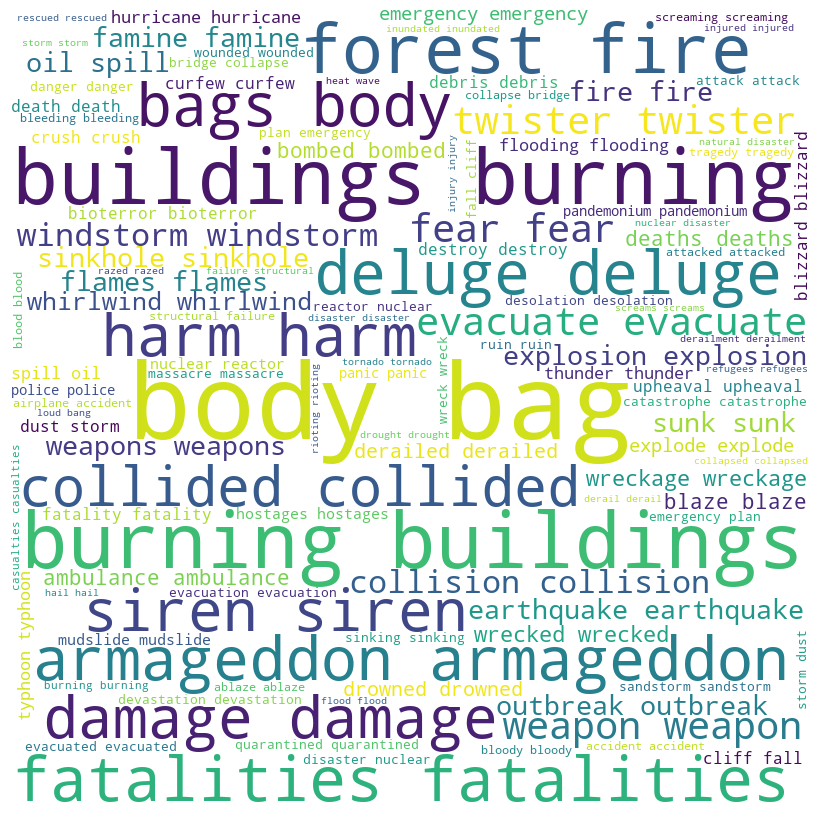

In [30]:
keyword = ""
stopwords = set(STOPWORDS)

for index, row in df.iterrows():
    if pd.isna(row['keyword'])!= True:
        keyword += " "+row['keyword']

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(keyword)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Keyword Extractor YAKE vs BERT

https://medium.com/@adityamishra.rishu/keyword-extractor-yake-35870de21a0d

In [31]:
pip install yake

Note: you may need to restart the kernel to use updated packages.


In [32]:
# Keyword etractor example with Yake
import yake

text = "residents asked shelter place being notified officers evacuation shelter place orders expected"
# Specifying Parameters
language = "en"
max_ngram_size = 1
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 1

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)

for kw in keywords:
    print(kw)

('shelter', 0.10463417723629108)


#### BERT keyword extractor

<center>
    <img src = images/bert_example.png width = 50%/>
</center>

https://huggingface.co/yanekyuk/bert-keyword-extractor

In [33]:
# Keyword etractor example with BERT
from transformers import pipeline
pipe = pipeline("token-classification", model="yanekyuk/bert-keyword-extractor")
result = pipe("residents asked shelter place being notified officers evacuation shelter place orders expected")
print(result)
print(result[0])
print(result[0].get('word'))

[{'entity': 'B-KEY', 'score': 0.9372667, 'index': 9, 'word': 'shelter', 'start': 65, 'end': 72}]
{'entity': 'B-KEY', 'score': 0.9372667, 'index': 9, 'word': 'shelter', 'start': 65, 'end': 72}
shelter


In [34]:
# compare keyword generation between BERT and YAKE
for index, row in df.iloc[10:15].iterrows():
    if(pd.isnull(row['keyword'])):
        print("\n")
        print(row['text'])
        print(pipe(row['text']))
        print(custom_kw_extractor.extract_keywords(row['text']))



people died heat wave far
[{'entity': 'B-KEY', 'score': 0.9998497, 'index': 3, 'word': 'heat', 'start': 12, 'end': 16}, {'entity': 'I-KEY', 'score': 0.9999114, 'index': 4, 'word': 'wave', 'start': 17, 'end': 21}]
[('people', 0.15831692877998726)]


haha south tampa flooded hah wait second live south tampa am gon na am gon na fuck
[]
[('gon', 0.07571113878390312)]


18 19 days ive lost count
[]
[('days', 0.15831692877998726)]


ago mandar arrived ago
[{'entity': 'B-KEY', 'score': 0.99800354, 'index': 2, 'word': 'man', 'start': 4, 'end': 7}, {'entity': 'I-KEY', 'score': 0.99775034, 'index': 3, 'word': '##dar', 'start': 7, 'end': 10}]
[('ago', 0.14323823713631006)]


damage school bus 80 multi car crash
[]
[('damage', 0.15831692877998726)]


## Conclusion

Examples 

- people died heat wave far
    - Keyword from BERT - [{'entity': 'B-KEY', 'score': 0.9998497, 'index': 3, 'word': 'heat', 'start': 12, 'end': 16}, {'entity': 'I-KEY', 'score': 0.9999114, 'index': 4, 'word': 'wave', 'start': 17, 'end': 21}]
    - Keyword from YAKE - [('people', 0.15831692877998726)]

- haha south tampa flooded hah wait second live south tampa am gon na am gon na fuck
    -  Keyword from BERT - []
    - Keyword from YAKE - [('gon', 0.07571113878390312)]

The keyword generationo needs to be modified to detect the disaster words. Currently both the models are not giving relevant keyword in both the cases and could be detrimental to analysis 

Refer - https://www.researchgate.net/publication/333072450_Keyphrase_Extraction_from_Disaster-related_Tweets 

In [35]:
# uncomment the following code to add keyword using the BERT model 

# keyword_list = []
# for index, row in df.iterrows():
#     if(pd.isnull(row['keyword'])):
#         result = pipe(row['text']))
#         print(custom_kw_extractor.extract_keywords(row['text']))
#         if(len(result)>1):
#             df.at[index,'keyword'] = result[0].get('word')
#             keyword_list.append(result[0].get('word'))

# print(keyword_list)

# Sentiment Analysis 

In [36]:
pip install torch

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [37]:
# Example of sentiment analysis with hugging face 
from transformers import pipeline
classifier = pipeline("sentiment-analysis")
classifier("I love BERT")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.999843955039978}]

In [38]:
sentiment_list = []
score_list = []

# for index, row in df.tail().iterrows(): #uncomment for testing with smaller datasize
for index, row in df.iterrows():
    result = classifier(row['text'])
    if(len(result)>=1):
        sentiment_list.append(result[0].get('label'))
        score_list.append(result[0].get('score'))
    else:
        sentiment_list.append("Missing")
        score_list.append(0)
        
df['sentiment'] = sentiment_list
df['score'] = score_list

In [39]:
df.head()

,id,keyword,location,text,target,sentiment,score
0,1,NaN,NaN,deeds reason may allah forgive,1,POSITIVE,0.969080
1,4,NaN,NaN,forest fire near la range ask canada,1,NEGATIVE,0.960770
2,5,NaN,NaN,residents asked shelter place being notified officers evacuation shelter place orders expected,1,NEGATIVE,0.989976
3,6,NaN,NaN,13000 people receive evacuation orders california,1,NEGATIVE,0.954775
4,7,NaN,NaN,just photo ruby smoke pours school,1,POSITIVE,0.984378


In [40]:
df.to_csv('nlp-getting-started/train_with_text_processed_and_sentiment.csv',index=False)

## Visualise the sentiment analysis 

In [41]:
import seaborn as sns

<Axes: xlabel='sentiment', ylabel='Count'>

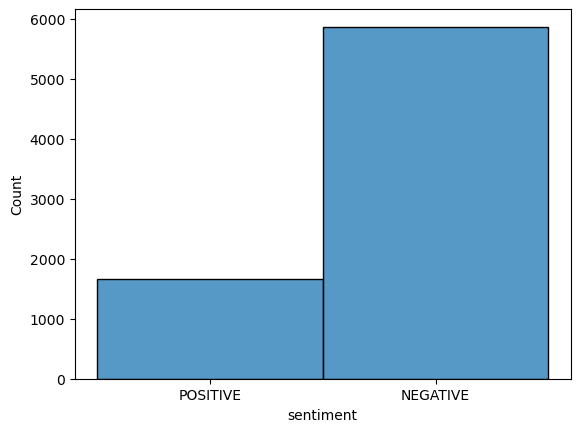

In [42]:
sns.histplot(data=df, x="sentiment")

<Axes: xlabel='sentiment', ylabel='score'>

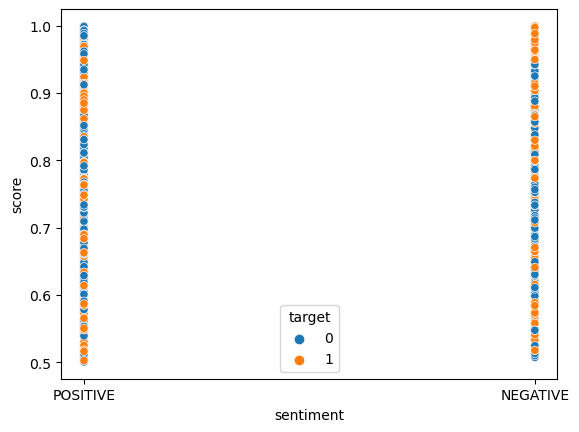

In [43]:
sns.scatterplot(data=df, x="sentiment", y="score", hue="target")

<Axes: xlabel='score', ylabel='target'>

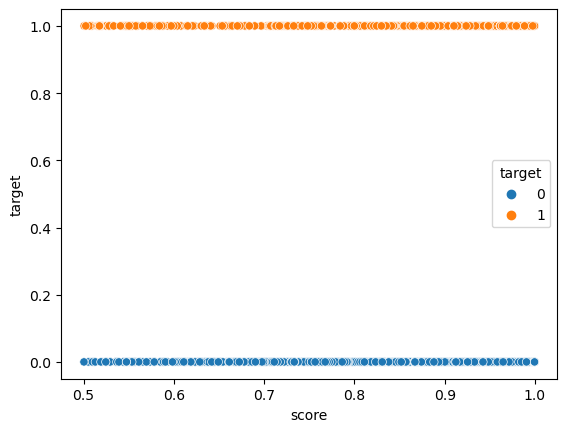

In [44]:
df_positive = df[df["sentiment"] == "NEGATIVE"]
sns.scatterplot(data=df, x="score", y="target", hue="target")

# df_positive = df[df["sentiment"] == "POSITIVE"]
# sns.scatterplot(data=df, x="score", y="target", hue="target")

# Analysis of the sentiment and the result target
- Does a negative sentiment imply the results are inclined towards being true 

In [50]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [51]:
# Declare feature vector and target variable 
X = df[['sentiment', 'score']]
y = df['target']
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [52]:
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['sentiment']), 
                                     remainder = StandardScaler())


In [53]:
fivepipe = Pipeline([('transform', transformer), ('knn', KNeighborsClassifier(n_neighbors=5))])
fivepipe.fit(X_train, y_train)
fivepipe_acc = fivepipe.score(X_test, y_test)

print(fivepipe_acc)

0.5698353690918747


In [54]:
y_test_pred=fivepipe.predict(X_test)

cfm=confusion_matrix(y_test, y_test_pred)
trueNegative=cfm[0][0]
falsePossitive=cfm[0][1]
false_negative=cfm[1][0]
truePositive=cfm[1][1]

print("Confusion Matrix", cfm)

Confusion Matrix [[746 341]
 [469 327]]


#### Confusion Matrix

Reference - https://www.kaggle.com/code/jurk06/knn-classification-using-gridseachcv


<center>
    <img src = images/confusion_matrix.jpeg width = 50%/>
</center>

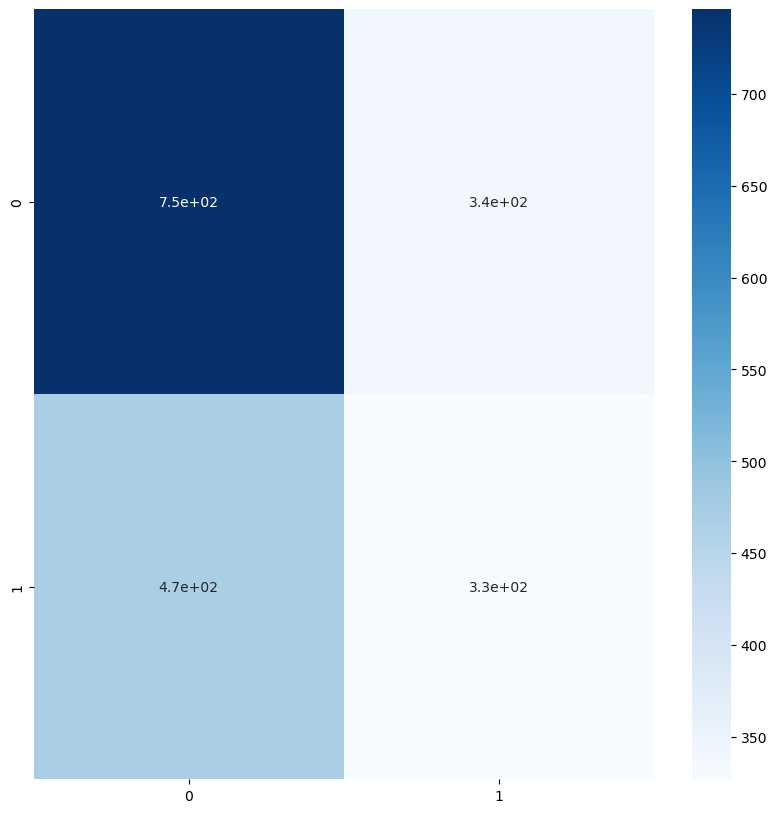

In [55]:
cfm_df=pd.DataFrame(cfm, range(2), range(2))
plt.figure(figsize=(10,10))
sns.heatmap(cfm_df, cmap='Blues', annot=True)
plt.show()

## Conclusion

Based on the confusion matrix based on the sentiment and target(whether the sentiment indicates an actual disaster event). Its not a good benchmark for Disaster Tweet prediction

# Create an Embed for the Text 

## Vectorize text 

#### Traditional vectorization approaches
1. Bag of words using CountVectorizer 
2. TF-IDF
3. word2vec

#### Pre-trained Word Embedding
Modern Natural Language Processing (NLP) uses word embeddings that have been previously trained on a large corpus of text and are hence called ‘Pre-trained Word Embeddings.’ Pre-trained word embeddings are a type of Transfer Learning. They are trained on large datasets that can enhance the performance of a Natural Language Processing (NLP) model because they capture both the connotative and syntactic meaning of a word. All of these word embeddings are useful during hackathons and in real-world scenarios.

4. BERT

###  1. Using CountVectorizer to create a bag of words representation of text

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [57]:
# Example 
X = ["Mr. Green killed Colonel Mustard in the study with the candlestick. \
Mr. Green is not a very nice fellow.",
     "Professor Plum has a green plant in his study.",
    "Miss Scarlett watered Professor Plum's green plant while he was away \
from his office last week."]

vectorizer = CountVectorizer()
vectorizer.fit(X)
vectorizer.vocabulary_

{'mr': 14,
 'green': 5,
 'killed': 11,
 'colonel': 2,
 'mustard': 15,
 'in': 9,
 'the': 24,
 'study': 23,
 'with': 30,
 'candlestick': 1,
 'is': 10,
 'not': 17,
 'very': 25,
 'nice': 16,
 'fellow': 3,
 'professor': 21,
 'plum': 20,
 'has': 6,
 'plant': 19,
 'his': 8,
 'miss': 13,
 'scarlett': 22,
 'watered': 27,
 'while': 29,
 'he': 7,
 'was': 26,
 'away': 0,
 'from': 4,
 'office': 18,
 'last': 12,
 'week': 28}

In [58]:
X_bag_of_words = vectorizer.transform(X)
print(X_bag_of_words)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 5)	2
  (0, 9)	1
  (0, 10)	1
  (0, 11)	1
  (0, 14)	2
  (0, 15)	1
  (0, 16)	1
  (0, 17)	1
  (0, 23)	1
  (0, 24)	2
  (0, 25)	1
  (0, 30)	1
  (1, 5)	1
  (1, 6)	1
  (1, 8)	1
  (1, 9)	1
  (1, 19)	1
  (1, 20)	1
  (1, 21)	1
  (1, 23)	1
  (2, 0)	1
  (2, 4)	1
  (2, 5)	1
  (2, 7)	1
  (2, 8)	1
  (2, 12)	1
  (2, 13)	1
  (2, 18)	1
  (2, 19)	1
  (2, 20)	1
  (2, 21)	1
  (2, 22)	1
  (2, 26)	1
  (2, 27)	1
  (2, 28)	1
  (2, 29)	1


In [59]:
df.head()

,id,keyword,location,text,target,sentiment,score
0,1,NaN,NaN,deeds reason may allah forgive,1,POSITIVE,0.969080
1,4,NaN,NaN,forest fire near la range ask canada,1,NEGATIVE,0.960770
2,5,NaN,NaN,residents asked shelter place being notified officers evacuation shelter place orders expected,1,NEGATIVE,0.989976
3,6,NaN,NaN,13000 people receive evacuation orders california,1,NEGATIVE,0.954775
4,7,NaN,NaN,just photo ruby smoke pours school,1,POSITIVE,0.984378


In [60]:
# Feature Engineering 
# -- removing location column since it has too many nulls 
# -- dropping all rows with keyword set to null 

df_train = pd.DataFrame(df)
df_train = df_train.drop(['location'], axis = 1)
df_train = df_train.dropna()
df_train.shape

(7469, 6)

In [61]:
# ignorning the sentiment data for the trianing 
X = df_train.drop(['target','sentiment','score','id','keyword'], axis = 1)
y = df_train['target']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X['text'], y, random_state = 42)

In [63]:
# Document Term Matrix
# a mathematical matrix that describes the frequency of terms that occur in a collection of documents. 
# In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms.

cvect = CountVectorizer(stop_words = 'english', max_features = 900)
dtm = cvect.fit_transform(X_train)

pd.DataFrame(dtm.toarray(), columns = cvect.get_feature_names_out()).head()

,00,05,10,100,11,12,13,14,15,150805,...,york,youtube,yr,zone,ûª,ûªs,ûªt,ûï,ûò,ûó
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
#Evaluate the performance using Logistic Regression 

vect_pipe = Pipeline([('cvect', CountVectorizer(stop_words = 'english', max_features = 900)),
                       ('lgr', LogisticRegression())])
vect_pipe.fit(X_train, y_train)
test_acc = vect_pipe.score(X_test, y_test)
y_pred=vect_pipe.predict(X_train)

print("Test set Accuracy Score: ", test_acc)
print("Training set Accuracy Score: ", metrics.accuracy_score(y_train, y_pred))
print("Recall Score: ", metrics.recall_score(y_train, y_pred))
print("Average Precision Score: ", metrics.average_precision_score(y_train, y_pred))

Test set Accuracy Score:  0.7751605995717344
Training set Accuracy Score:  0.8421710408855562
Recall Score:  0.7353187919463087
Average Precision Score:  0.7552376374376963


### 2. TF-IDF (term frequency-inverse document frequency) 

$$\text{tfidf} = \frac{\text{term frequency}}{\text{inverse document frequency}}$$


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [66]:
df_train = pd.DataFrame(df)
df_train = df_train.drop(['location'], axis = 1)
df_train = df_train.dropna()
X = df_train.drop(['target','sentiment','score','id','keyword'], axis = 1)
y = df_train['target']
X_train, X_test, y_train, y_test = train_test_split(X['text'], y, random_state = 42)

In [67]:
tfidf = TfidfVectorizer()
dtm = tfidf.fit_transform(X_train)
pd.DataFrame(dtm.toarray(), columns = tfidf.get_feature_names_out()).head()

,00,000,0000,0011,0025,005225,01,010156,010217,0104,...,ûïyou,ûò,ûò800000,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûónegligence,ûótech
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
#Evaluate the performance using Logistic Regression 
tfidf_pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words = 'english', max_features = 900)),
                       ('lgr', LogisticRegression())])
tfidf_pipe.fit(X_train, y_train)
test_acc = tfidf_pipe.score(X_test, y_test)
y_pred=tfidf_pipe.predict(X_train)

print("Test set Accuracy Score: ", test_acc)
print("Training set Accuracy Score: ", metrics.accuracy_score(y_train, y_pred))
print("Recall Score: ", metrics.recall_score(y_train, y_pred))
print("Average Precision Score: ", metrics.average_precision_score(y_train, y_pred))

Test set Accuracy Score:  0.7794432548179872
Training set Accuracy Score:  0.8289591144438493
Recall Score:  0.7135067114093959
Average Precision Score:  0.7361504637616629


### 3. Word2vec
Word2vec is a group of related models that are used to produce word embeddings.


In [69]:
pip install --upgrade gensim

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [70]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

In [71]:
disaster_tweets = []
df_w2vec = pd.DataFrame(df_train)
for index, row in df_w2vec.iterrows():
    words = word_tokenize(row['text']) 
    if(len(words) == 0): #if the tweet has no tokens then delete it 
        df_w2vec.drop(index, inplace=True)
    else:
        disaster_tweets.append(words)

In [72]:
model = Word2Vec(sentences=disaster_tweets, vector_size=100, min_count=1)
model.save("disastertweet.model")

In [73]:
model = Word2Vec.load("disastertweet.model")
sims = model.wv.most_similar('forest', topn=10)  # get other similar words
print(sims)

# given the dataset we trained on

[('fire', 0.9752233028411865), ('like', 0.9740955829620361), ('people', 0.9732819199562073), ('just', 0.973231852054596), ('amp', 0.9728146195411682), ('down', 0.9728050827980042), ('can', 0.972484827041626), ('new', 0.9720931053161621), ('im', 0.9715270400047302), ('emergency', 0.9710952043533325)]


In [74]:
model = Word2Vec.load("disastertweet.model")

w2v=[]
for index, row in df_w2vec.iterrows():
    sentence_vector=np.zeros(100) #create 300 dimensions of zeros
    words = word_tokenize(row['text'])
    for word in words:
        try: # for missing key exception 
            vec=model.wv[word] #get the vector representation of the word
            sentence_vector+=vec #add the vector to sentence_vector
        except Exception:
            print(word)
            pass
    w2v.append(sentence_vector)

df_w2vec['embedding'] = w2v

In [75]:
df_w2vec.head(2)

,id,keyword,text,target,sentiment,score,embedding
31,48,ablaze,wholesale markets ablaze,1,NEGATIVE,0.962016,"[-0.01854224526323378, 0.02929675648920238, 0.01016888560843654, -0.0047503202222287655, 0.005829834379255772, -0.034516443498432636, 0.030518913641572, 0.04514382081106305, -0.002217554021626711, -0.0205837725661695, -0.0199751784093678, -0.030634310329332948, -0.019342650892212987, -0.009585127234458923, 0.027568895602598786, -0.013129746774211526, -0.01810708688572049, -0.013162735383957624, 0.006522034294903278, -0.04379062890075147, 0.008104150299914181, 0.006217136280611157, 0.027530115679837763, 0.0019079773337580264, 0.015622795093804598, 0.006620567000936717, -0.020042057381942868, 0.001618970651179552, -0.028461591340601444, 0.010269281221553683, 0.03592064091935754, -0.0069270876701921225, -0.01329631230328232, -0.028161860071122646, -0.006676399381831288, -0.003256485564634204, 0.00513430341379717, 0.012284994125366211, -0.01485858263913542, -0.02025309589225799, 0.019276097882539034, -0.01619712566025555, -0.00369667774066329, 0.004940726095810533, 0.00698064872995019, -0.018542368663474917, -0.0031189951114356518, 0.01283690333366394, -0.0013814078702125698, 0.03182860743254423, 0.006530192447826266, -0.0023411738220602274, -0.01087989762891084, -0.006800010334700346, -0.014134362805634737, 0.005059599177911878, 0.03216782712843269, -0.004748185921926051, -0.019655751428217627, 0.010223882971331477, -0.008615774801000953, 0.00644851359538734, 0.0007372745785687584, -0.010235623456537724, -0.026277402066625655, 0.03187508508563042, 0.016739041544497013, 0.014366313582286239, -0.026190067641437054, 0.016278362600132823, -0.011897803749889135, 0.007083849937771447, 0.02374993567354977, -0.02721529919654131, 0.02439279796089977, 0.016284355544485152, 0.0004963064566254616, -0.001250769942998886, -0.007544901221990585, 0.011434143409132957, -0.0032830180134624243, -0.003457819577306509, -0.0018671685829758644, 0.015484967996599153, -0.009094717912375927, 0.0002319851191714406, 0.012755794217810035, 0.018715222482569516, 0.04656139016151428, 0.03204592131078243, 0.02150859055109322, 0.012950540578458458, 0.011188002885319293, -0.012197669129818678, 0.02196533977985382, 0.006158002419397235, 0.008883831091225147, -0.034256295301020145, 0.017170046688988805, 0.011707166209816933]"
32,49,ablaze,try bring heavy,0,NEGATIVE,0.993266,"[-0.041873310692608356, 0.04899610672146082, 0.01839196914806962, 0.018047391204163432, 0.008606041315943003, -0.04941234365105629, 0.04377221968024969, 0.07336358539760113, -0.003757389262318611, -0.015043576015159488, -0.031910238205455244, -0.05624281242489815, -0.012428474612534046, 0.015013442913186736, 0.0212922936771065, -0.024195465492084622, 0.02231004787608981, -0.0347250304184854, 0.013274379190988839, -0.06373384781181812, 0.007794078439474106, 0.013065790524706244, 0.0366965620778501, -0.02465721871703863, 0.00192763099403237, 0.006339076440781355, -0.05195793230086565, -0.0121176578104496, -0.026925288140773773, 0.01733113802038133, 0.04401502525433898, -0.008064993424341083, 0.0007377071306109428, -0.00985312508419156, -0.017538166139274836, 0.0037443318869918585, 0.015192946186289191, -0.008229356724768877, -0.04024213273078203, -0.058633158914744854, -0.0019197040237486362, -0.01624518190510571, -0.013860856648534536, 0.020741438027471304, 0.021454519126564264, -0.03712815325707197, -0.020730689248011913, 0.022085199365392327, 0.03028287913184613, 0.0373942400328815, -0.0013171397149562836, -0.03975141033879481, -0.020072639807040105, 0.00022142293164506555, -0.028361921664327383, 0.018666155636310577, 0.05197810661047697, -0.0028123375959694386, -0.013239166932180524, 0.026323282159864902, -0.018496877513825893, 0.017882685642689466, 0.01642709190491587, 0.010707875480875373, -0.05029013566672802, 0.031670630909502506, -0.014718496706336737, 0.015618635676219128, -0.048778378404676914, 0.02790466556325555, -0.03382626734673977, 0.009179094224236906, 0.05362231470644474, 

### Avg Word2Vec
Avg Word2Vec is an extension of the Word2Vec model that generates vector representations for sentences or documents instead of individual words. It works by taking the average of the vector representations of all the words in a sentence or document to generate a single vector representation for the entire text. This approach can be useful in cases where we want to classify or compare entire texts rather than individual words.

##### Average Word2Vec(R)=1/n[Word2Vec(w1)+Word2Vec(w2)+……+Word2Vec(wn)]

In [76]:
def get_avgword2vec(df_w2vec):
    avgw2v=[]
    for index, row in df_w2vec.iterrows():
        sentence_vector=np.zeros(100) #create 100 dimensions of zeros
        words = word_tokenize(row['text'])
        count_word=0
        for word in words:
            try: # for missing key exception 
                vec=model.wv[word] #get the vector representation of the word
                sentence_vector+=vec #add the vector to sentence_vector
                count_word+=1
            except Exception:
                print(word)
                pass
        if count_word!=0:
            sentence_vector/=count_word
        avgw2v.append(sentence_vector)
    return avgw2v

df_avgw2v = pd.DataFrame(df_train)
df_avgw2v['avgw2v'] = get_avgword2vec(df_avgw2v)

In [77]:
print(df_avgw2v.iloc[4:5])

    id keyword                                  text  target sentiment  \
35  53  ablaze  plus side look sky last night ablaze       0  POSITIVE   

       score  \
35  0.989832   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

### KNN on Average Word2Vec

In [78]:
# Train using the embedding 
X = df_avgw2v['avgw2v']
y = df_avgw2v['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [79]:
knn_avgw2v=KNeighborsClassifier(n_neighbors=5,algorithm='brute')
knn_avgw2v.fit(X_train,y_train)

ValueError: setting an array element with a sequence.

### Solution for KNN "ValueError: setting an array element with a sequence."

Each row in the avgw2v has the shape (100,). When this data is fed as is into the KNN trianing set we get an error. The problem X_train is a 2D array where the element can be of any size. 

Inorder to fix this I had to convert each row item from (100,) to (1,100)

In [80]:
# Convert the shape of avgw2v from (100,) to (1,100). 
full_array = np.empty((7469, 100))
for index, row in df_avgw2v.iterrows():
    arr = row['avgw2v'] 
    arr_flattened = np.reshape(arr, (1,np.product(arr.shape))) 
    np.append(full_array, arr_flattened, axis=0) 
    
X = full_array
y = df_avgw2v['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
knn_avgw2v=KNeighborsClassifier(n_neighbors=5,algorithm='brute')
knn_avgw2v.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute')

In [81]:
test_acc = knn_avgw2v.score(X_test, y_test)
y_pred=knn_avgw2v.predict(X_train)

print("Test set Accuracy Score: ", test_acc)
print("Training set Accuracy Score: ", metrics.accuracy_score(y_train, y_pred))
print("Recall Score: ", metrics.recall_score(y_train, y_pred))
print("Average Precision Score: ", metrics.average_precision_score(y_train, y_pred))

Test set Accuracy Score:  0.5728051391862955
Training set Accuracy Score:  0.5743617211212283
Recall Score:  0.0
Average Precision Score:  0.42563827887877165


### Conclusion 
word2Vec model doesn't look too promising with this training model. An out of the box trianing model with a large corpus of data might perform better.

# Addtional Exploration 
1. Retrieval Augmented Generation (RAG) Architecture 
2. Retrieval-Augmented Generation vs. Semantic Search
3. BERT 

# Retrieval Augmented Generation (RAG)

## Characteristics of foundational models 
- Foundation models are usually trained offline, making the model agnostic to any data that is created after the model was trained. 
- Foundation models are trained on very general domain corpora, making them less effective for domain-specific tasks.
- Large pre-trained language model's ability to access and precisely manipulate knowledge is still limited, and hence on knowledge-intensive tasks, their performance lags behind task-specific architectures.

## RAG
- Retrieval Augmented Generation (RAG) is used to retrieve data from outside a foundation model and augment your prompts by adding the relevant retrieved data in context
- models which combine pre-trained parametric and non-parametric memory for language generation

<center>
    <img src = images/rag_architecture.png width = 100%/>
</center>

### Steps in RAG 
- Retrieval step, user presents prompt + query. The input query is processed as follows, 
    - Input query. This is the starting point where a user provides a query or a question that they want an answer to.
    - Encoding. The input query is processed and encoded into a representation that can be used for further steps. This encoding captures the essence of the query in a format that the system can work with.
    - Document retrieval. Using the encoded query, the system searches a large corpus of information to retrieve relevant documents or passages. This is done using a dense retrieval method which is efficient and can fetch the most relevant pieces of information.
    - Retrieved documents. These are the documents or passages that the system believes are most relevant to the encoded query. They contain potential answers or information related to the original query.
- Generation step. 
    - Context encoding. The retrieved documents are then encoded, similar to how the original query was encoded. This step prepares the documents for the generation process.
    - Encoded documents. This is the result of the context encoding step. It's a representation of the retrieved documents that's ready to be combined with the encoded query.
    - Combine encoded query + documents. The encoded query and the encoded documents are combined together. This combination provides a rich context that the system will use to generate a final answer.
    - Generation using LLM (Large Language Model.) This is where the magic happens! Using the combined context from the previous step, a Large Language Model (like GPT-3 or GPT-4) generates a coherent and relevant answer. It tries to provide the best possible response based on the information it has.
    - Output (answer.) This is the final result. It's the answer or response generated by the system in reply to the original input query.
- Training. 
    - The entire system, including the retrieval and generation components are fine-tuned end-to-end.
    
### RAG  in AI application 
<center>
    <img src = images/rag_ai_application.png width = 70%/>
</center>

In [82]:
# Retrieval-Augmented Generation Example using Huggingface 

from transformers import pipeline

# Define a function for retrieval
def retrieve_documents(query):
    # Use your retrieval method here, e.g., Elasticsearch or dense vector retrieval
    # Return a list of relevant documents
    # Sample relevant documents for the query "Tell me about Albert Einstein"
    relevant_documents = [
        "Albert Einstein was a famous physicist who developed the theory of relativity.",
        "He was born on March 14, 1879, in Ulm, Germany, and died on April 18, 1955, in Princeton, New Jersey, USA.",
        "Einstein's most famous equation is E=mc^2, which relates energy (E) to mass (m) and the speed of light (c).",
        "He won the Nobel Prize in Physics in 1921 for his work on the photoelectric effect.",
        "Albert Einstein's contributions to science revolutionized our understanding of the universe."
    ]
    return relevant_documents

# Define a function for generation
def generate_response(relevant_documents):
    # Use a pre-trained language model for text generation
    generator = pipeline("text-generation", model="gpt2")

    # Concatenate the relevant documents into a single string
    context = " ".join(relevant_documents)

    # Generate text based on the retrieved information
    generated_text = generator(context, max_length=100)[0]["generated_text"]

    return generated_text

# Example usage
query = "Tell me about Albert Einstein"
retrieved_docs = retrieve_documents(query)
response = generate_response(retrieved_docs)
print(response)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Input length of input_ids is 108, but `max_length` is set to 100. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.


Albert Einstein was a famous physicist who developed the theory of relativity. He was born on March 14, 1879, in Ulm, Germany, and died on April 18, 1955, in Princeton, New Jersey, USA. Einstein's most famous equation is E=mc^2, which relates energy (E) to mass (m) and the speed of light (c). He won the Nobel Prize in Physics in 1921 for his work on the photoelectric effect. Albert Einstein's contributions to science revolutionized our understanding of the universe. Einstein


## Retrieval-Augmented Generation Example using LangChain
- LangChain is a Python library that makes it easy to build retrieval-augmented generation (RAG) models.

In [113]:
pip install langchain

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [114]:
pip install openai

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [101]:
pip install tiktoken

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI
        
def query_pdf(query):
    
    document = """ Albert Einstein was a famous physicist who developed the theory of relativity.
        He was born on March 14, 1879, in Ulm, Germany, and died on April 18, 1955, in Princeton, New Jersey, USA.
        Einstein's most famous equation is E=mc^2, which relates energy (E) to mass (m) and the speed of light (c)
        He won the Nobel Prize in Physics in 1921 for his work on the photoelectric effect.
        Albert Einstein's contributions to science revolutionized our understanding of the universe.
        """
    
    # Split document in chunks
    text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
    pages = text_splitter.create_documents(document)

    embeddings = OpenAIEmbeddings()
    # Create vectors
    vectorstore = FAISS.from_documents(pages, embeddings)
    # Persist the vectors locally on disk
    vectorstore.save_local("faiss_index_constitution")

    # Load from local storage
    persisted_vectorstore = FAISS.load_local("faiss_index_constitution", embeddings)

    # Use RetrievalQA chain for orchestration
    qa = RetrievalQA.from_chain_type(llm=OpenAI(), chain_type="stuff", retriever=persisted_vectorstore.as_retriever())
    result = qa.run(query)
    print(result)

    
query_pdf("When was Albert Einstein born")


# def main():
#     query = input("Type in your query: \n")
#     while query != "exit":
#         query_pdf(query)
#         query = input("Type in your query: \n")


# if __name__ == "__main__":
#     main()

### ErrorCode 429 when using the constitution.pdf

When using the code snippet 
```
    # Load document using PyPDFLoader document loader
    loader = PyPDFLoader("pdf/constitution.pdf")
    documents = loader.load()
    # Split document in chunks
    text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=30, separator="\n")
    docs = text_splitter.split_documents(documents=documents)
```  

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

Given the size of the pdf the data is large or diverse that requires a lot of requests to process. Switched to smaller dataset

Tried with a smaller dataset but still ran into the same issue.  

### Conclusion 
For assistant use cases integrating with OpenAI API directly would be preferred compared to 3rd party library like Langchain 

# Retrieval-Augmented Generation vs. Semantic Search

- RAG isn’t the only technique used to improve the accuracy of LLM-based generative AI. Another technique is semantic search, which helps the AI system narrow down the meaning of a query by seeking deep understanding of the specific words and phrases in the prompt.

Traditional search is focused on keywords. For example, a basic query asking about the tree species native to France might search the AI system’s database using “trees” and “France” as keywords and find data that contains both keywords—but the system might not truly comprehend the meaning of trees in France and therefore may retrieve too much information, too little, or even the wrong information. That keyword-based search might also miss information because the keyword search is too literal: The trees native to Normandy might be missed, even though they’re in France, because that keyword was missing.

Semantic search goes beyond keyword search by determining the meaning of questions and source documents and using that meaning to retrieve more accurate results. Semantic search is an integral part of RAG.

<center>
    <img src = images/TensorIoT-Gen-AI-Semantic-Search-1.png width = 40%/>
</center>

### What is Semantic Search?
Semantic search is a way for AI assistant to understand the meaning behind words and provide more relevant answer based on context.

### What are Vectors?
Vectors, in the context of semantic search, are mathematical representations of words or documents. They capture the semantic meaning and context by mapping words or documents to numerical vectors in a high-dimensional space

### What is VectorDB?
Vector DB is a database that stores data in a way that represents the relationships and similarities between different pieces of information, making it easier to retrieve relevant results in semantic search.

# The building blocks of an AI-powered semantic search

## 1. Semantic indexing
- It is a technique used in information retrieval to organize and categorize documents based on their meaning rather than just their words. It involves analyzing the content of each document and assigning it to a set of keywords or concepts that describe its main ideas.
## 2. Embedding
- It is the process of creating numerical representations as vectors in a high-dimensional space of words or documents that capture their meanings.

Putting it togeter 
- Convert chunks of the documents into a format called embeddings 
- Store those embeddings in a database
- Convert the user query into an embedding as well
- Compare it against the stored embeddings

## Using FAISS(Facebook AI Similarity Search) to Build a Semantic Search

In [2]:
pip install faiss-cpu

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [26]:
# simple example 

from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import faiss

data = [['This is an example sentence', 'sentence'], 
        ['Each sentence is converted', 'sentence'],
        ['This is a sentence-transformers model', 'model']]
df = pd.DataFrame(data, columns = ['text', 'category'])

# Create vectors from the text
sentences = df['text']
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
vectors = model.encode(sentences)
print(vectors.shape)
print(vectors.shape[1])

# build a FAISS index from the vectors
dimension = vectors.shape[1]
index = faiss.IndexFlatL2(vector_dimension)
index.add(vectors)

# create a search vector 
search_text = 'example sentence'
search_vector = model.encode(search_text)
search_vector_arr = np.array([search_vector])

# search 
k = index.ntotal
distances, ans = index.search(search_vector_arr, k=k)

results = pd.DataFrame({'distances': distances[0], 'ans': ans[0]})
results.head()

# print the closest match 
print(df.iloc[ans[0][0]])
print(df.iloc[ans[0][1]])
print(df.iloc[ans[0][2]])

(3, 384)
384
text        This is an example sentence
category                       sentence
Name: 0, dtype: object
text        This is a sentence-transformers model
category                                    model
Name: 2, dtype: object
text        Each sentence is converted
category                      sentence
Name: 1, dtype: object


In [30]:
# Using FAISS for disater tweet analysis 
df_faiss = pd.read_csv('nlp-getting-started/train_with_text_processed_keyword.csv')
sentences = df_faiss['text']
vectors = model.encode(sentences)
print(vectors.shape)
print(vectors.shape[1])

(7520, 384)
384


In [31]:
dimension = vectors.shape[1]
disaster_index = faiss.IndexFlatL2(vector_dimension)
disaster_index.add(vectors)

In [43]:
# create a search vector 
search_text = 'happy holidays'
search_vector = model.encode(search_text)
search_vector_arr = np.array([search_vector])

# search 
k = index.ntotal
distances, ans = disaster_index.search(search_vector_arr, k=k)

results = pd.DataFrame({'distances': distances[0], 'ans': ans[0]})
results.head()

#print the top 3 matches match 
print(df_faiss.iloc[ans[0][0]]['text'])
print(df_faiss.iloc[ans[0][1]]['text'])
print(df_faiss.iloc[ans[0][2]]['text'])

wonderful day
ruin holidays 3 work zone
happy birthday young blood


### search result analysis 

search_text = 'fire evacuation'
- theres fire alarm going years keep working minutes decide evacuate
- tonight being interesting minutes ago fire system went evacuate building
- evacuate life

search_text = 'happy holidays'
- wonderful day
- ruin holidays 3 work zone
- happy birthday young blood

In the second example, "ruin holidays 3 work zone" couuld be an incorrect intepretation of the contextual meaning. 

### What is BERT?
BERT, short for Bidirectional Encoder Representations from Transformers, is a Machine Learning (ML) model for natural language processing. It was developed in 2018 by researchers at Google AI Language and serves as a swiss army knife solution to 11+ of the most common language tasks, such as sentiment analysis and named entity recognition.

#### What is BERT used for?
BERT can be used on a wide variety of language tasks:

- Can determine how positive or negative a movie’s reviews are. (Sentiment Analysis)
- Helps chatbots answer your questions. (Question answering)
- Predicts your text when writing an email (Gmail). (Text prediction)
- Can write an article about any topic with just a few sentence inputs. (Text generation)
- Can quickly summarize long legal contracts. (Summarization)
- Can differentiate words that have multiple meanings (like ‘bank’) based on the surrounding text. (Polysemy resolution)

Reference - https://huggingface.co/blog/bert-101 

In [45]:
!pip install transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [46]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-uncased')
unmasker("Artificial Intelligence [MASK] take over the world.")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.3182411193847656,
  'token': 2064,
  'token_str': 'can',
  'sequence': 'artificial intelligence can take over the world.'},
 {'score': 0.1829962283372879,
  'token': 2097,
  'token_str': 'will',
  'sequence': 'artificial intelligence will take over the world.'},
 {'score': 0.05600151792168617,
  'token': 2000,
  'token_str': 'to',
  'sequence': 'artificial intelligence to take over the world.'},
 {'score': 0.04519502446055412,
  'token': 2015,
  'token_str': '##s',
  'sequence': 'artificial intelligences take over the world.'},
 {'score': 0.04515310749411583,
  'token': 2052,
  'token_str': 'would',
  'sequence': 'artificial intelligence would take over the world.'}]

# BERT Embeddings

Embeddings are representations of values or objects like text, images, and audio that are designed to be consumed by machine learning models and semantic search algorithms. They translate objects like these into a mathematical form according to the factors or traits each one may or may not have, and the categories they belong to.

- https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/
- https://medium.com/mlearning-ai/getting-contextualized-word-embeddings-with-bert-20798d8b43a4

In [51]:
from transformers import BertModel, BertTokenizer
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased',
           output_hidden_states = True,)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [52]:
def bert_text_preparation(text, tokenizer):
    marked_text = "[CLS] " + text + " [SEP]"
    tokenized_text = tokenizer.tokenize(marked_text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    segments_ids = [1]*len(indexed_tokens)
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensor = torch.tensor([segments_ids])
    return tokenized_text, tokens_tensor, segments_tensor

In [53]:
def get_bert_embeddings(tokens_tensor, segments_tensor, model):
    with torch.no_grad():
        outputs = model(tokens_tensor, segments_tensor)
        hidden_states = outputs[2]
    token_embeddings = torch.stack(hidden_states, dim=0)
    token_embeddings = torch.squeeze(token_embeddings, dim=1)
    token_embeddings = token_embeddings.permute(1,0,2)
    token_vecs_sum = []
    for token in token_embeddings:
        sum_vec = torch.sum(token[-4:], dim=0)
        token_vecs_sum.append(sum_vec)
    return token_vecs_sum

In [55]:
sentence = "residents asked shelter place being notified officers evacuation shelter place orders expected"
tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(sentence, tokenizer)
embedding = get_bert_embeddings(tokens_tensor, segments_tensors, model)
print(len(embedding))

14
